## Модули

In [1]:
import random
import matplotlib.pyplot as plt

## Нахождение минимума функции с помощью метода градиентного спуска

In [2]:
# заданная функция
def f_x1_x2(x1, x2):
    y = 3 * x1**2 + 2 * x2**2 + 4 * x1 * x2 - 5 * x1 + 6 * x2

    return y


# частная производная функции по x1
def df_dx1(x1, x2):
    y = 6 * x1 + 4 * x2 - 5

    return y


# частная производная функции по x2
def df_dx2(x1, x2):
    y = 4 * x2 + 4 * x1 + 6

    return y


# определение минимума функции с помощью градиентного спуска
def gradient_descent(
    func,
    vars_initial=(None,),
    derivatives_func=(None,),
    lr=0.1,
    eps=0.000001,
    max_iters=10000,
):
    vars = []
    vars.extend(vars_initial)

    y_hist = [func(*vars)]
    vars_hist = [[vars[i]] for i in range(len(vars))]

    while len(y_hist) < max_iters:
        y = func(*vars)

        for i in range(len(vars)):
            vars[i] = vars[i] - lr * derivatives_func[i](*vars)
            vars_hist[i].append(vars[i])

        y_hist.append(func(*vars))
        if abs(y - func(*vars)) < eps:
            break

    result = {
        "y_min": func(*vars),
        "vars": vars,
        "y_history": y_hist,
        "vars_history": vars_hist,
    }

    return result

Найдем минимум функции.

In [3]:
vars_initial = (0, 0)
result = gradient_descent(
    f_x1_x2, vars_initial=vars_initial, derivatives_func=(df_dx1, df_dx2)
)

print(f"(x1_init, x2_init) = ({vars_initial[0]:.2f}, {vars_initial[1]:.2f})")
print(
    f"y_min = {result['y_min']:.2f} (x1, x2) = ({result['vars'][0]:.2f}, {result['vars'][1]:.2f}) num_iters = {len(result['y_history'])}"
)

(x1_init, x2_init) = (0.00, 0.00)
y_min = -34.75 (x1, x2) = (5.50, -7.00) num_iters = 71


Построим графики изменения минимума и коэффициентов в процессе градиентного спуска.

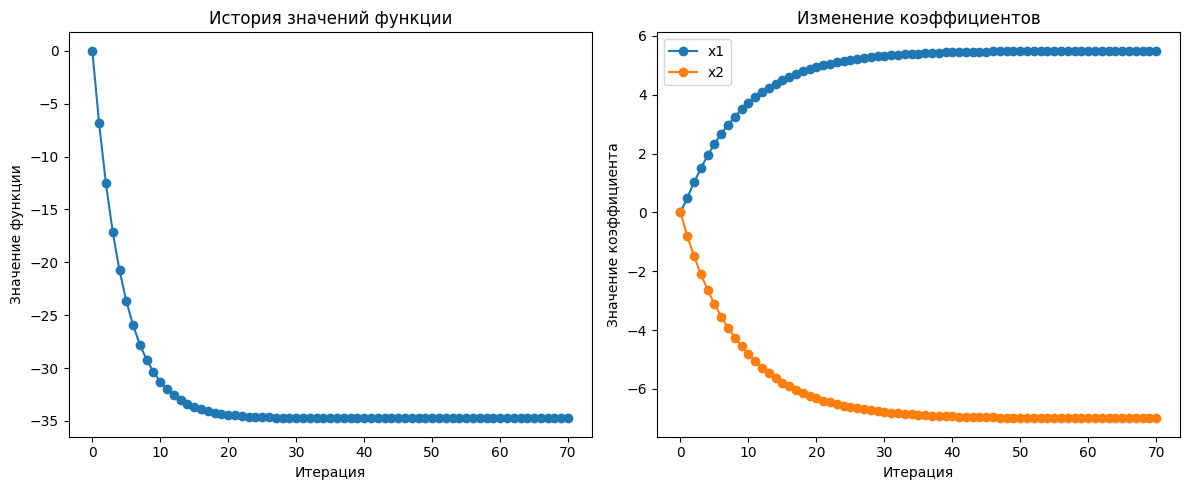

In [4]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

axes[0].plot(result["y_history"], marker="o")
axes[0].set_title("История значений функции")
axes[0].set_xlabel("Итерация")
axes[0].set_ylabel("Значение функции")

axes[1].plot(result["vars_history"][0], marker="o", label="x1")
axes[1].plot(result["vars_history"][1], marker="o", label="x2")
axes[1].set_title("Изменение коэффициентов")
axes[1].set_xlabel("Итерация")
axes[1].set_ylabel("Значение коэффициента")
axes[1].legend()

plt.tight_layout()
plt.show()

Проверим как изменяется минимум функции в зависимости от начальных значений x1 и x2.

In [5]:
random.seed(10)
for _ in range(5):
    vars_initial = tuple([random.uniform(-100, 100) for _ in range(2)])
    result = gradient_descent(
        f_x1_x2, vars_initial=vars_initial, derivatives_func=(df_dx1, df_dx2)
    )

    print(f"(x1_init, x2_init) = ({vars_initial[0]:.2f}, {vars_initial[1]:.2f})")
    print(
        f"y_min = {result['y_min']:.2f} (x1, x2) = ({result['vars'][0]:.2f}, {result['vars'][1]:.2f}) num_iters = {len(result['y_history'])}"
    )
    print()

(x1_init, x2_init) = (14.28, -14.22)
y_min = -34.75 (x1, x2) = (5.50, -7.00) num_iters = 72

(x1_init, x2_init) = (15.62, -58.78)
y_min = -34.75 (x1, x2) = (5.50, -7.00) num_iters = 86

(x1_init, x2_init) = (62.66, 64.72)
y_min = -34.75 (x1, x2) = (5.50, -7.00) num_iters = 86

(x1_init, x2_init) = (30.69, -67.95)
y_min = -34.75 (x1, x2) = (5.50, -7.00) num_iters = 88

(x1_init, x2_init) = (4.13, -34.45)
y_min = -34.75 (x1, x2) = (5.50, -7.00) num_iters = 80



Можно видеть, что при изменении начальных значений x1 и x2, величина минимума, а также значения x-ов при которых она достигнута не изменяется с точностью до сотых долей величины.

## Ответ
- y_min = -34.75 при (x1, x2) = (5.50, -7.00).